# Task 1

# Stock Market Analysis + Prediction using LSTM

In [1]:
# Install required libraries
!pip install pandas_datareader
!pip install yfinance
!pip install keras
!pip install tensorflow-datasets


In [2]:
# Import necessary libraries
from pandas_datareader.data import DataReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
import yfinance as yf
yf.pdr_override()

In [4]:
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Fetch stock data from Yahoo Finance
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [8]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


In [9]:
# Plot closing prices of the stocks
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)


<Figure size 1500x1000 with 0 Axes>

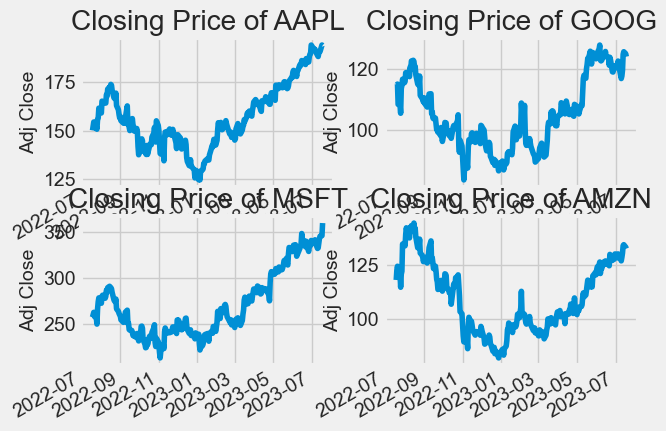

In [10]:
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")


In [11]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

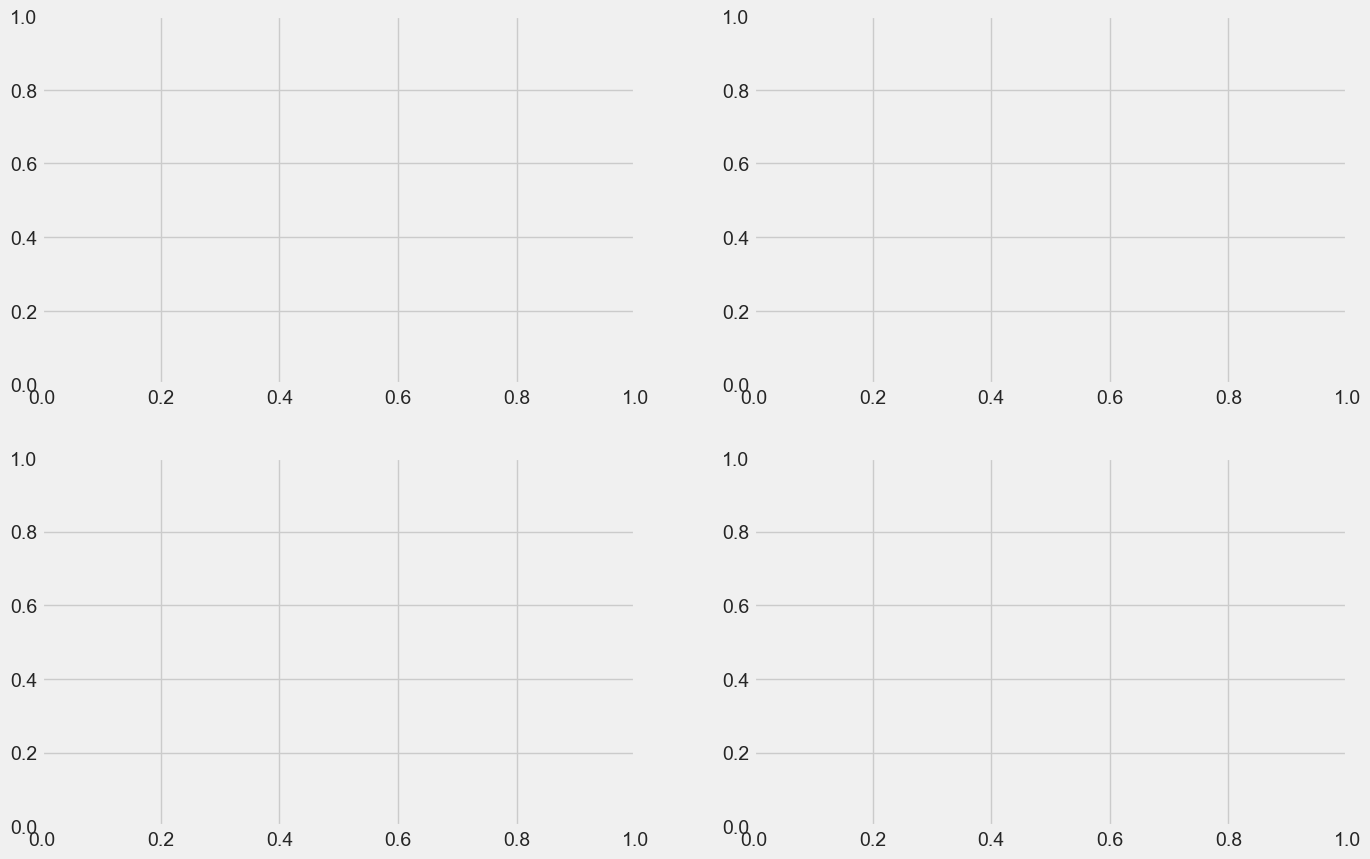

In [12]:
# Calculate Moving Averages (MA) of the various stocks
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

In [13]:
for i, company in enumerate(company_list, 1):
    ax = axes[(i - 1) // 2, (i - 1) % 2]
    company[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=ax)
    ax.set_title(f"{company_name[i-1]}")
    ax.set_xlabel(None)
    ax.set_ylabel("Price")
    ax.legend()

In [14]:
fig.tight_layout()

In [15]:
# Calculate Daily Return of the stock on average
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

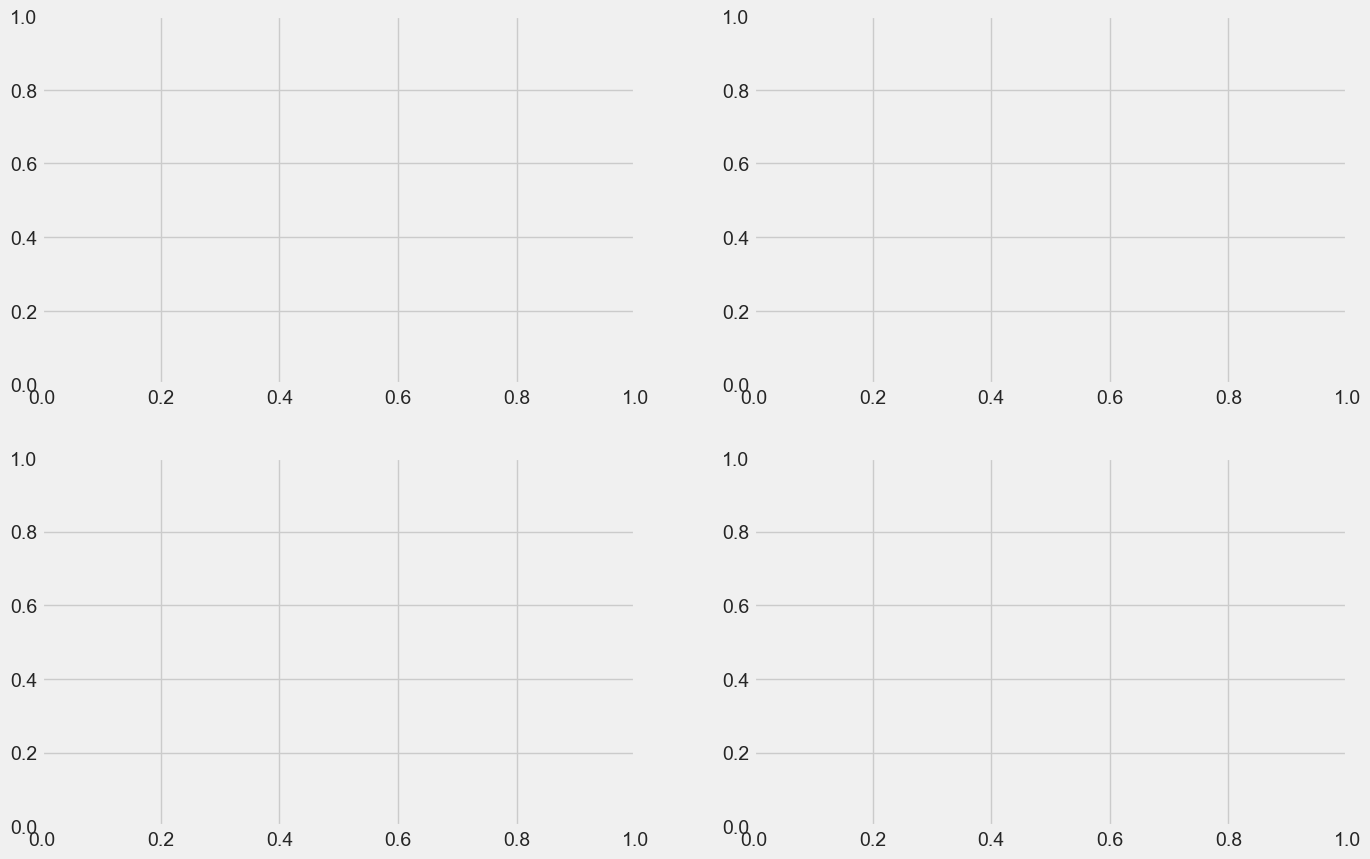

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


In [17]:
for i, company in enumerate(company_list, 1):
    ax = axes[(i - 1) // 2, (i - 1) % 2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(f'{company_name[i - 1]}')
    ax.set_xlabel(None)
    ax.set_ylabel("Daily Return")

In [18]:
fig.tight_layout()

In [19]:
plt.figure(figsize=(12, 9))

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

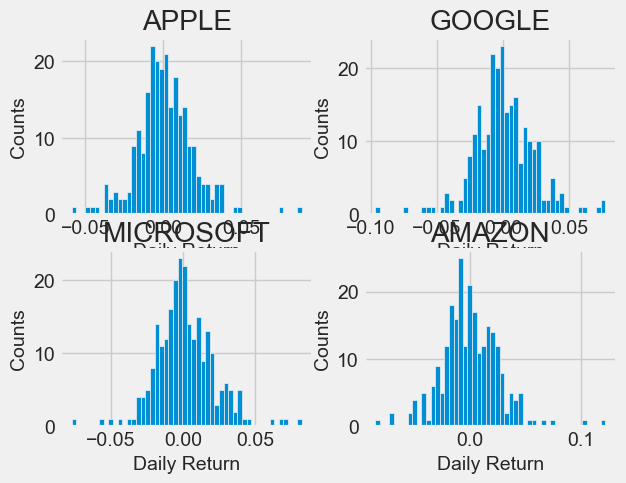

In [20]:
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

In [21]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

<Axes: title={'center': 'Correlation of Stock Returns'}>

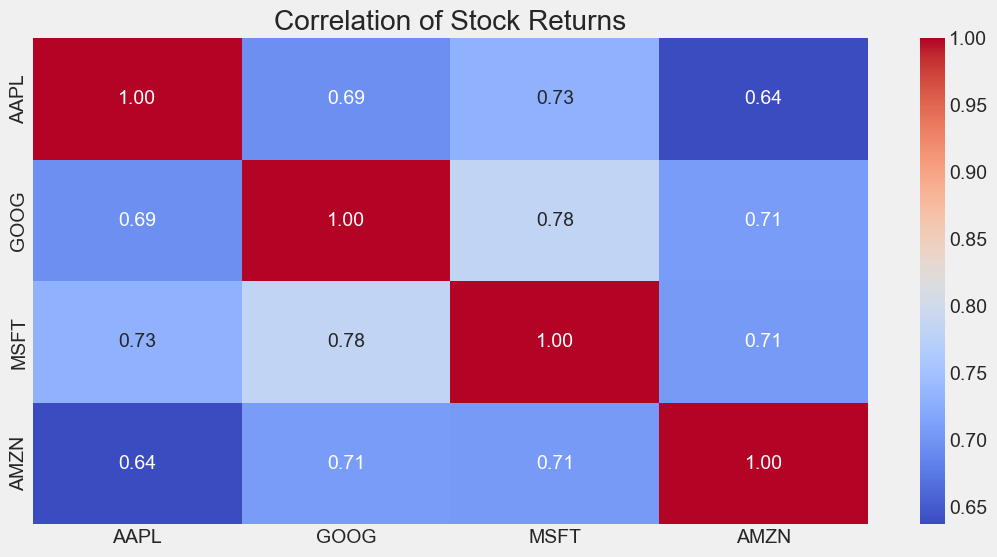

In [22]:
# Correlation between different stocks closing prices
closing_df = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in zip(tech_list, company_list)})
tech_rets = closing_df.pct_change()

plt.figure(figsize=(12, 6))
plt.title('Correlation of Stock Returns')
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm', fmt=".2f")


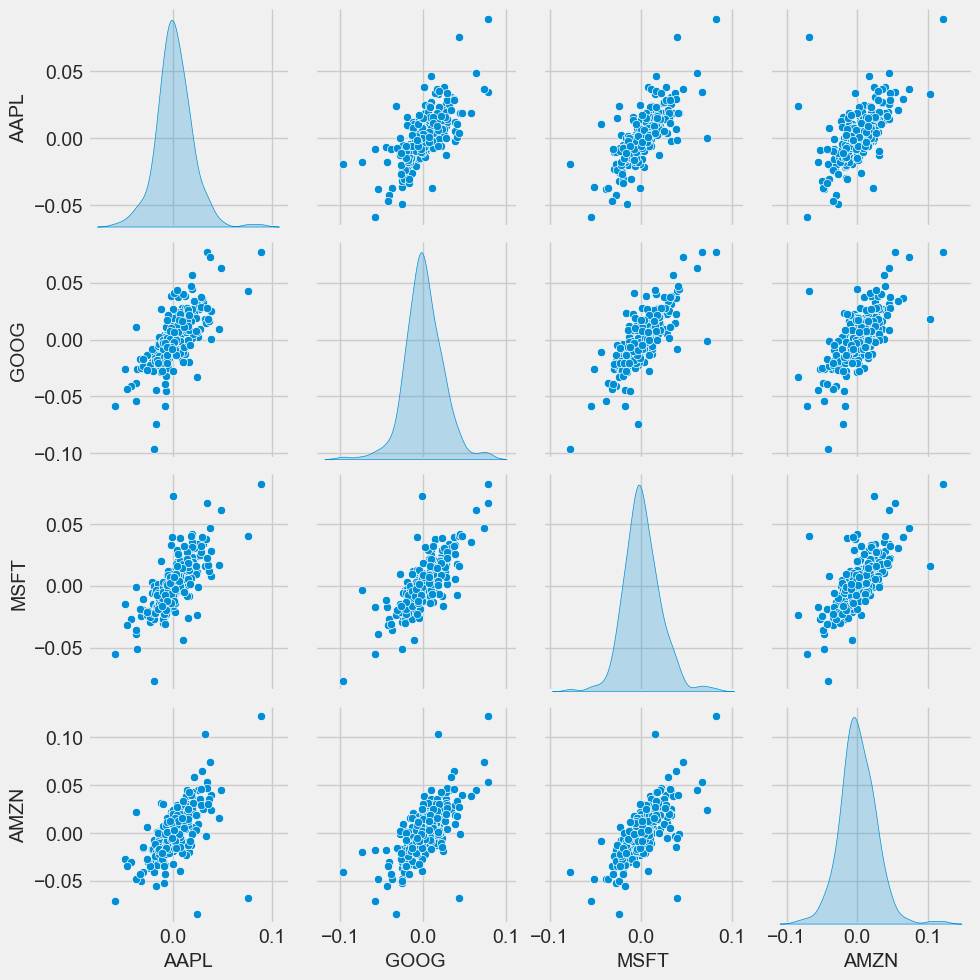

In [23]:
# Pair Plot of Daily Returns
sns.pairplot(tech_rets.dropna(), kind='scatter', diag_kind='kde', palette='coolwarm')


In [24]:
# LSTM Model for Stock Price Prediction
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
# Create a new dataframe with only the Close column
data = AAPL.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [27]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [28]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [29]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

179/179 [==============================] - 10s 26ms/step - loss: 0.0113


In [33]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

In [34]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [35]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [36]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 1s/step


In [38]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.7845224781077693
